In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "Inference_Results/pythia-2.8B-MC/checkpoint-7080/"

shuffle = 1

df_mat = pd.read_csv(data_dir + "mat_comp_shuffle" + f"{shuffle:02}" + ".csv")
df_mat_app = pd.read_csv(data_dir + "mat_app_comp_shuffle" + f"{shuffle:02}" + ".csv")
df_prod = pd.read_csv(data_dir + "prod_comp_shuffle" + f"{shuffle:02}" + ".csv")

# Add year info

In [3]:
df_mat["year"] = "0000"

for i in range(len(df_mat)):
    DOI = df_mat.loc[i, "DOI"]
    for sec in DOI.split("."):
        if sec in [str(yr) for yr in range(1950, 2024)]:
            df_mat.loc[i, "year"] = sec

df_mat

,DOI,prompt,comp_option,comp_term,year
0,10.1016/j.conbuildmat.2013.06.081,### Instructions: Extract information of raw m...,['50'],['coal bottom ash'],2013
1,10.1016/j.conbuildmat.2012.07.078,### Instructions: Extract information of raw m...,['24'],['silica fume'],2012
2,10.1111/j.1551-2916.2007.02108.x,### Instructions: Extract information of raw m...,['59'],['Class C fly ash'],2007
3,10.1016/j.conbuildmat.2005.09.011,### Instructions: Extract information of raw m...,['13'],['coal fly ash'],2005
4,10.1016/j.conbuildmat.2011.06.019,### Instructions: Extract information of raw m...,['58'],['limestone powder'],2011
...,...,...,...,...,...
6854,10.1016/j.resconrec.2012.12.003,### Instructions: Extract information of raw m...,['43'],['construction and demolition waste'],2012
6855,10.1016/j.conbuildmat.2020.119251,### Instructions: Extract information of raw m...,['43'],['construction and demolition waste'],2020
6856,10.1016/j.resconrec.2006.05.010,### Instructions: Extract information of raw m...,['44'],['recycled aggregate'],2006
6857,10.1016/j.jclepro.2018.03.085,### Instructions: Extract information of raw m...,['43'],['construction and demolition waste'],2018


In [4]:
df_mat_app["year"] = "0000"

for i in range(len(df_mat_app)):
    DOI = df_mat_app.loc[i, "DOI"]
    for sec in DOI.split("."):
        if sec in [str(yr) for yr in range(1950, 2024)]:
            df_mat_app.loc[i, "year"] = sec

df_mat_app

,DOI,mat,prompt,comp_option,comp_term,year
0,10.1016/j.conbuildmat.2013.06.081,coal bottom ash,### Instructions: Extract information about th...,['07'],['fine aggregate'],2013
1,10.1016/j.conbuildmat.2012.07.078,silica fume,### Instructions: Extract information about th...,['03'],['supplementary cementitious material'],2012
2,10.1111/j.1551-2916.2007.02108.x,Class C fly ash,### Instructions: Extract information about th...,['03'],['supplementary cementitious material'],2007
3,10.1016/j.conbuildmat.2005.09.011,coal fly ash,### Instructions: Extract information about th...,['03'],['supplementary cementitious material'],2005
4,10.1016/j.conbuildmat.2011.06.019,limestone powder,### Instructions: Extract information about th...,['07'],['fine aggregate'],2011
...,...,...,...,...,...,...
7099,10.1016/j.resconrec.2012.12.003,construction and demolition waste,### Instructions: Extract information about th...,['03'],['supplementary cementitious material'],2012
7100,10.1016/j.conbuildmat.2020.119251,construction and demolition waste,### Instructions: Extract information about th...,['07'],['fine aggregate'],2020
7101,10.1016/j.resconrec.2006.05.010,recycled aggregate,### Instructions: Extract information about th...,['01'],['aggregate'],2006
7102,10.1016/j.jclepro.2018.03.085,construction and demolition waste,### Instructions: Extract information about th...,['03'],['supplementary cementitious material'],2018


In [5]:
df_mat_app_year = df_mat_app[(df_mat_app["year"]!="0000")]

df_mat_app_year

,DOI,mat,prompt,comp_option,comp_term,year
0,10.1016/j.conbuildmat.2013.06.081,coal bottom ash,### Instructions: Extract information about th...,['07'],['fine aggregate'],2013
1,10.1016/j.conbuildmat.2012.07.078,silica fume,### Instructions: Extract information about th...,['03'],['supplementary cementitious material'],2012
2,10.1111/j.1551-2916.2007.02108.x,Class C fly ash,### Instructions: Extract information about th...,['03'],['supplementary cementitious material'],2007
3,10.1016/j.conbuildmat.2005.09.011,coal fly ash,### Instructions: Extract information about th...,['03'],['supplementary cementitious material'],2005
4,10.1016/j.conbuildmat.2011.06.019,limestone powder,### Instructions: Extract information about th...,['07'],['fine aggregate'],2011
...,...,...,...,...,...,...
7099,10.1016/j.resconrec.2012.12.003,construction and demolition waste,### Instructions: Extract information about th...,['03'],['supplementary cementitious material'],2012
7100,10.1016/j.conbuildmat.2020.119251,construction and demolition waste,### Instructions: Extract information about th...,['07'],['fine aggregate'],2020
7101,10.1016/j.resconrec.2006.05.010,recycled aggregate,### Instructions: Extract information about th...,['01'],['aggregate'],2006
7102,10.1016/j.jclepro.2018.03.085,construction and demolition waste,### Instructions: Extract information about th...,['03'],['supplementary cementitious material'],2018


# Mat

In [6]:
mat_set = set(list(df_mat_app_year["mat"].dropna()))

len(mat_set)

73

## Count topics of previous and recent periods

### Separate from 2015

In [7]:
mat_stat = [{"material": mat,
             "count": len(df_mat_app_year[(df_mat_app_year["mat"]==mat)]),
             "count_pre2015": len(df_mat_app_year[(df_mat_app_year["mat"]==mat)&(df_mat_app_year["year"].to_numpy(dtype="int")<2015)]),
             "count_pos2015": len(df_mat_app_year[(df_mat_app_year["mat"]==mat)&(df_mat_app_year["year"].to_numpy(dtype="int")>=2015)])}\
            for mat in mat_set]

mat_stat = pd.DataFrame.from_records(mat_stat)

mat_stat

,material,count,count_pre2015,count_pos2015
0,calcium carbide residue,13,2,11
1,raw rice husk,13,3,10
2,flax fibre,2,1,1
3,ladle furnace slag,13,4,9
4,recycled aggregate,36,14,22
...,...,...,...,...
68,siltstone,1,1,0
69,zeolite,85,35,50
70,aluminosilicate,1,0,1
71,colloidal nano-silica,7,3,4


In [8]:
tot_pre2015 = sum(mat_stat["count_pre2015"])
tot_pos2015 = sum(mat_stat["count_pos2015"])

mat_stat["freq_pre2015_per1000"] = 1000*mat_stat["count_pre2015"]/tot_pre2015
mat_stat["freq_pos2015_per1000"] = 1000*mat_stat["count_pos2015"]/tot_pos2015

mat_stat["trend_factor"] = (mat_stat["freq_pos2015_per1000"]-mat_stat["freq_pre2015_per1000"])/mat_stat["freq_pre2015_per1000"]
mat_stat = mat_stat.replace(float("inf"), 1000)

#mat_stat = mat_stat[(mat_stat["freq_pre2015_per1000"]>0)&(mat_stat["freq_pos2015_per1000"]>0)]
mat_stat = mat_stat[(mat_stat["material"]!="unknown")&(mat_stat["material"]!="fly ash")].reset_index()

mat_stat

,index,material,count,count_pre2015,count_pos2015,freq_pre2015_per1000,freq_pos2015_per1000,trend_factor
0,0,calcium carbide residue,13,2,11,0.956023,3.359805,2.514356
1,1,raw rice husk,13,3,10,1.434034,3.054368,1.129912
2,2,flax fibre,2,1,1,0.478011,0.305437,-0.361026
3,3,ladle furnace slag,13,4,9,1.912046,2.748931,0.437691
4,4,recycled aggregate,36,14,22,6.692161,6.719609,0.004102
...,...,...,...,...,...,...,...,...
66,68,siltstone,1,1,0,0.478011,0.000000,-1.000000
67,69,zeolite,85,35,50,16.730402,15.271839,-0.087180
68,70,aluminosilicate,1,0,1,0.000000,0.305437,1000.000000
69,71,colloidal nano-silica,7,3,4,1.434034,1.221747,-0.148035


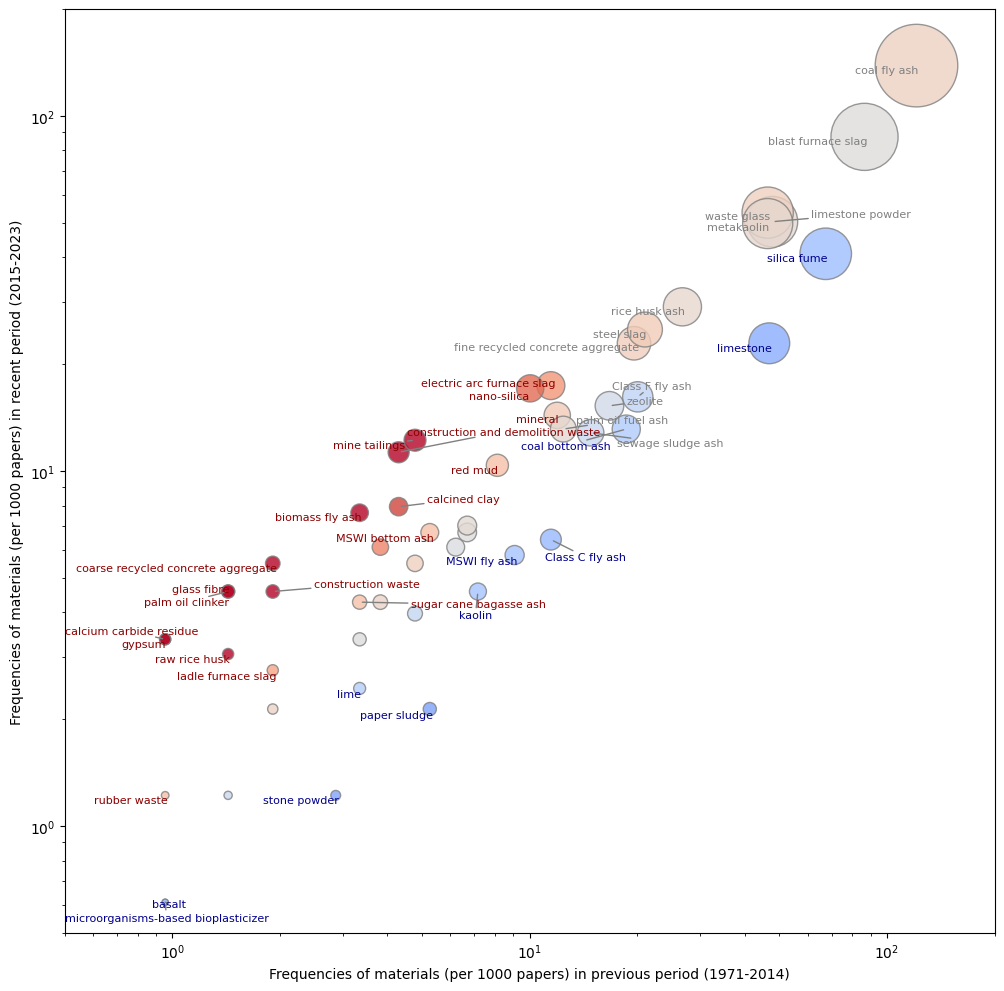

In [44]:
import seaborn as sns
import math
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(mat_stat["freq_pre2015_per1000"], y=mat_stat["freq_pos2015_per1000"], 
           s=mat_stat["count"]*5, 
           c=mat_stat["trend_factor"], vmin=-1, vmax=1, alpha=0.8, cmap="coolwarm", edgecolor="grey")

plt.xlim(0.5,200)
plt.ylim(0.5,200)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Frequencies of materials (per 1000 papers) in previous period (1971-2014)")
plt.ylabel("Frequencies of materials (per 1000 papers) in recent period (2015-2023)")

TEXTS = []
for i in range(len(mat_stat)):
    x = mat_stat["freq_pre2015_per1000"].iloc[i]
    y = mat_stat["freq_pos2015_per1000"].iloc[i]
    text = mat_stat["material"].iloc[i]
    trend = mat_stat["trend_factor"].iloc[i]
    size = mat_stat["count"].iloc[i]
    if text in ["silica"]:
        continue
    
    if (x>0.5 and y>0.5) and trend<-0.2:
        TEXTS.append(ax.text(x, y, text, color="darkblue", fontsize=8))
    elif (x>0.5 and y>0.5) and trend>0.2:
        TEXTS.append(ax.text(x, y, text, color="darkred", fontsize=8))
    elif (x>0.5 and y>0.5) and size>50:
        TEXTS.append(ax.text(x, y, text, color="grey", fontsize=8))

adjust_text(TEXTS, 
            #expand=(1.5,1.5),
            arrowprops=dict(arrowstyle="-", lw=1, color="grey"),
            ax=ax)


plt.savefig("Figs/Topic Trend/MAT_topic_trend_2015.jpg")

In [ ]:
# One way to plot (but with overlapping texts)

"""
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(mat_stat["freq_pre2015_per1000"], y=mat_stat["freq_pos2015_per1000"], 
            s=mat_stat["count"], c=mat_stat["trend_factor"], vmin=-1, vmax=1, alpha=0.8, cmap="coolwarm")


for i in range(len(mat_stat)):
    x = mat_stat["freq_pre2015_per1000"].iloc[i]
    y = mat_stat["freq_pos2015_per1000"].iloc[i]
    text = mat_stat["material"].iloc[i]]
    ax.annotate(text, (x,y), color="grey", fontsize=8)


plt.xscale("log")
plt.yscale("log")

plt.show()
"""

### Separate from 2010

In [9]:
mat_stat = [{"material": mat,
             "count": len(df_mat_app_year[(df_mat_app_year["mat"]==mat)]),
             "count_pre2010": len(df_mat_app_year[(df_mat_app_year["mat"]==mat)&(df_mat_app_year["year"].to_numpy(dtype="int")<2010)]),
             "count_pos2010": len(df_mat_app_year[(df_mat_app_year["mat"]==mat)&(df_mat_app_year["year"].to_numpy(dtype="int")>=2010)])}\
            for mat in mat_set]

mat_stat = pd.DataFrame.from_records(mat_stat)

mat_stat

,material,count,count_pre2010,count_pos2010
0,calcium carbide residue,13,2,11
1,raw rice husk,13,1,12
2,flax fibre,2,0,2
3,ladle furnace slag,13,2,11
4,recycled aggregate,36,7,29
...,...,...,...,...
68,siltstone,1,0,1
69,zeolite,85,14,71
70,aluminosilicate,1,0,1
71,colloidal nano-silica,7,0,7


In [10]:
tot_pre2010 = sum(mat_stat["count_pre2010"])
tot_pos2010 = sum(mat_stat["count_pos2010"])

mat_stat["freq_pre2010_per1000"] = 1000*mat_stat["count_pre2010"]/tot_pre2010
mat_stat["freq_pos2010_per1000"] = 1000*mat_stat["count_pos2010"]/tot_pos2010

mat_stat["trend_factor"] = (mat_stat["freq_pos2010_per1000"]-mat_stat["freq_pre2010_per1000"])/mat_stat["freq_pre2010_per1000"]
mat_stat = mat_stat.replace(float("inf"), 1000)

#mat_stat = mat_stat[(mat_stat["freq_pre2010_per1000"]>0)&(mat_stat["freq_pos2010_per1000"]>0)]
mat_stat = mat_stat[(mat_stat["material"]!="unknown")&(mat_stat["material"]!="fly ash")].reset_index()

mat_stat

,index,material,count,count_pre2010,count_pos2010,freq_pre2010_per1000,freq_pos2010_per1000,trend_factor
0,0,calcium carbide residue,13,2,11,2.403846,2.426114,0.009263
1,1,raw rice husk,13,1,12,1.201923,2.646670,1.202029
2,2,flax fibre,2,0,2,0.000000,0.441112,1000.000000
3,3,ladle furnace slag,13,2,11,2.403846,2.426114,0.009263
4,4,recycled aggregate,36,7,29,8.413462,6.396118,-0.239776
...,...,...,...,...,...,...,...,...
66,68,siltstone,1,0,1,0.000000,0.220556,1000.000000
67,69,zeolite,85,14,71,16.826923,15.659462,-0.069381
68,70,aluminosilicate,1,0,1,0.000000,0.220556,1000.000000
69,71,colloidal nano-silica,7,0,7,0.000000,1.543891,1000.000000


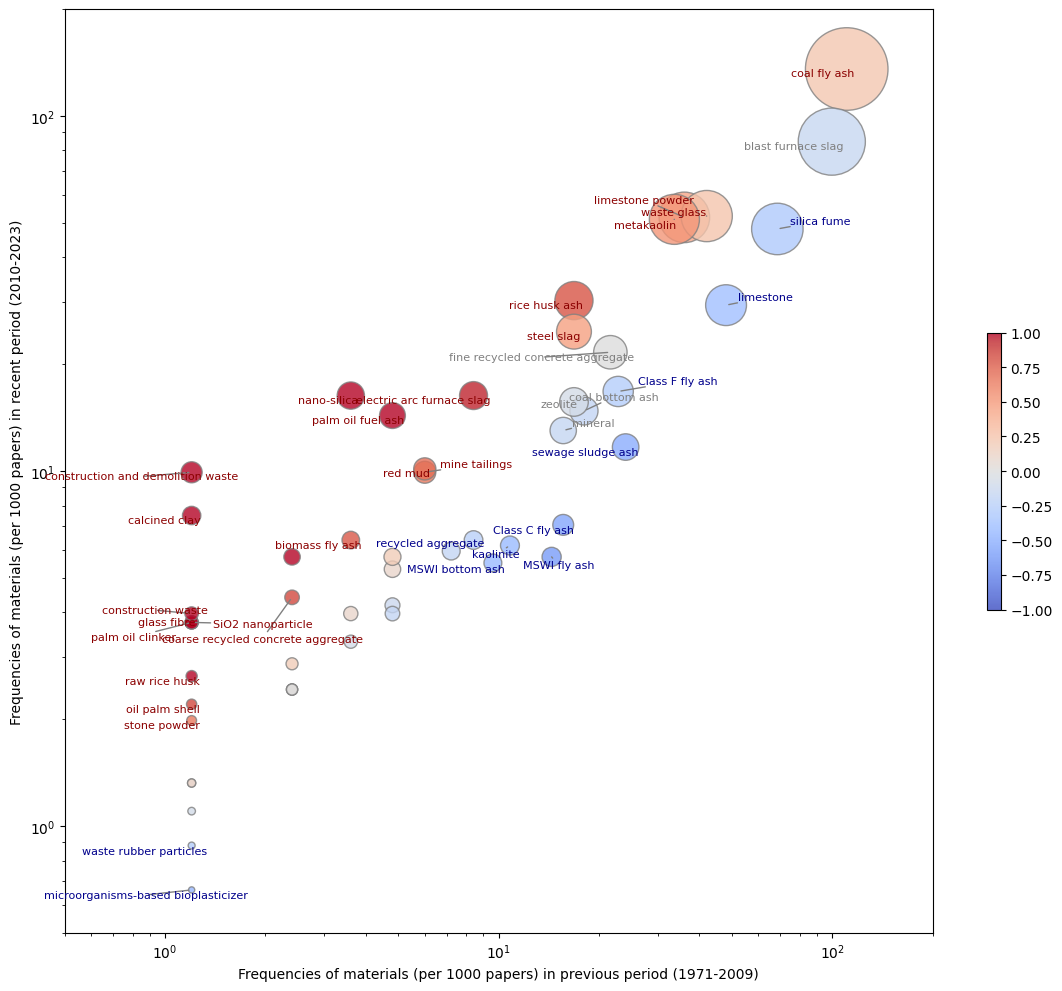

In [52]:
import seaborn as sns
import math
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(14,12))
bbp = ax.scatter(mat_stat["freq_pre2010_per1000"], y=mat_stat["freq_pos2010_per1000"], 
                 s=mat_stat["count"]*5, 
                 c=mat_stat["trend_factor"], vmin=-1, vmax=1, alpha=0.8, cmap="coolwarm", edgecolor="grey")

plt.xlim(0.5,200)
plt.ylim(0.5,200)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Frequencies of materials (per 1000 papers) in previous period (1971-2009)")
plt.ylabel("Frequencies of materials (per 1000 papers) in recent period (2010-2023)")

TEXTS = []
for i in range(len(mat_stat)):
    x = mat_stat["freq_pre2010_per1000"].iloc[i]
    y = mat_stat["freq_pos2010_per1000"].iloc[i]
    text = mat_stat["material"].iloc[i]
    trend = mat_stat["trend_factor"].iloc[i]
    size = mat_stat["count"].iloc[i]
    if text in ["silica"]:
        continue
    
    if (x>0.5 and y>0.5) and trend<-0.2:
        TEXTS.append(ax.text(x, y, text, color="darkblue", fontsize=8))
    elif (x>0.5 and y>0.5) and trend>0.2:
        TEXTS.append(ax.text(x, y, text, color="darkred", fontsize=8))
    elif (x>0.5 and y>0.5) and size>50:
        TEXTS.append(ax.text(x, y, text, color="grey", fontsize=8))

adjust_text(TEXTS, 
            #expand=(1.5,1.5),
            arrowprops=dict(arrowstyle="-", lw=1, color="grey"),
            ax=ax)


plt.colorbar(bbp, shrink=0.3)

plt.savefig("Figs/Topic Trend/MAT_topic_trend_2010.jpg")

# App

In [11]:
mat_app_records = []


for idx in range(len(df_mat_app_year)):
    row = dict(df_mat_app_year.iloc[idx])
    comp_term = row["comp_term"].replace("[", "").replace("]", "").replace("\'", "").replace("\"", "").split(",")
    for app in comp_term:
        mat_app_records.append({
            "DOI": row["DOI"],
            "year": row["year"],
            "prompt": row["prompt"],
            "mat": row["mat"],
            "app": app
        })

df_mat_app_new = pd.DataFrame.from_records(mat_app_records)

df_mat_app_new

,DOI,year,prompt,mat,app
0,10.1016/j.conbuildmat.2013.06.081,2013,### Instructions: Extract information about th...,coal bottom ash,fine aggregate
1,10.1016/j.conbuildmat.2012.07.078,2012,### Instructions: Extract information about th...,silica fume,supplementary cementitious material
2,10.1111/j.1551-2916.2007.02108.x,2007,### Instructions: Extract information about th...,Class C fly ash,supplementary cementitious material
3,10.1016/j.conbuildmat.2005.09.011,2005,### Instructions: Extract information about th...,coal fly ash,supplementary cementitious material
4,10.1016/j.conbuildmat.2011.06.019,2011,### Instructions: Extract information about th...,limestone powder,fine aggregate
...,...,...,...,...,...
5363,10.1016/j.resconrec.2012.12.003,2012,### Instructions: Extract information about th...,construction and demolition waste,supplementary cementitious material
5364,10.1016/j.conbuildmat.2020.119251,2020,### Instructions: Extract information about th...,construction and demolition waste,fine aggregate
5365,10.1016/j.resconrec.2006.05.010,2006,### Instructions: Extract information about th...,recycled aggregate,aggregate
5366,10.1016/j.jclepro.2018.03.085,2018,### Instructions: Extract information about th...,construction and demolition waste,supplementary cementitious material


## Count for APP

In [12]:
app_set = set(df_mat_app_new["app"].unique())

app_set.remove('')
app_set.remove("unknown")

app_set

{'additive',
 'aggregate',
 'clinker feedstock',
 'coarse aggregate',
 'filler',
 'fine aggregate',
 'geopolymer',
 'lightweight aggregate',
 'pore forming agent',
 'reinforced fibre',
 'superplasticizer',
 'supplementary cementitious material'}

### Separate from 2010

In [13]:
app_stat = [{"application": app,
             "count": len(df_mat_app_new[(df_mat_app_new["app"]==app)]),
             "count_pre2010": len(df_mat_app_new[(df_mat_app_new["app"]==app)&(df_mat_app_new["year"].to_numpy(dtype="int")<2010)]),
             "count_pos2010": len(df_mat_app_new[(df_mat_app_new["app"]==app)&(df_mat_app_new["year"].to_numpy(dtype="int")>=2010)])}\
            for app in app_set]

app_stat = pd.DataFrame.from_records(app_stat)

app_stat

,application,count,count_pre2010,count_pos2010
0,reinforced fibre,115,14,101
1,clinker feedstock,173,43,130
2,additive,16,6,10
3,aggregate,179,28,151
4,superplasticizer,29,7,22
5,geopolymer,741,64,677
6,lightweight aggregate,54,9,45
7,fine aggregate,264,27,237
8,supplementary cementitious material,2555,387,2168
9,coarse aggregate,98,15,83


In [14]:
tot_pre2010 = sum(app_stat["count_pre2010"])
tot_pos2010 = sum(app_stat["count_pos2010"])

app_stat["freq_pre2010_per1000"] = 1000*app_stat["count_pre2010"]/tot_pre2010
app_stat["freq_pos2010_per1000"] = 1000*app_stat["count_pos2010"]/tot_pos2010

app_stat["trend_factor"] = (app_stat["freq_pos2010_per1000"]-app_stat["freq_pre2010_per1000"])/app_stat["freq_pre2010_per1000"]
app_stat = app_stat.replace(float("inf"), 1000)

app_stat = app_stat[~(app_stat["application"].isin(["pore forming agent", "aggregate"]))].reset_index()

app_stat

,index,application,count,count_pre2010,count_pos2010,freq_pre2010_per1000,freq_pos2010_per1000,trend_factor
0,0,reinforced fibre,115,14,101,22.471910,27.312061,0.215387
1,1,clinker feedstock,173,43,130,69.020867,35.154137,-0.490674
2,2,additive,16,6,10,9.630819,2.704164,-0.719218
3,4,superplasticizer,29,7,22,11.235955,5.949162,-0.470525
4,5,geopolymer,741,64,677,102.728732,183.071931,0.782091
5,6,lightweight aggregate,54,9,45,14.446228,12.168740,-0.157653
6,7,fine aggregate,264,27,237,43.338684,64.088697,0.478787
7,8,supplementary cementitious material,2555,387,2168,621.187801,586.262845,-0.056223
8,9,coarse aggregate,98,15,83,24.077047,22.444565,-0.067802
9,10,filler,94,23,71,36.918138,19.199567,-0.479942


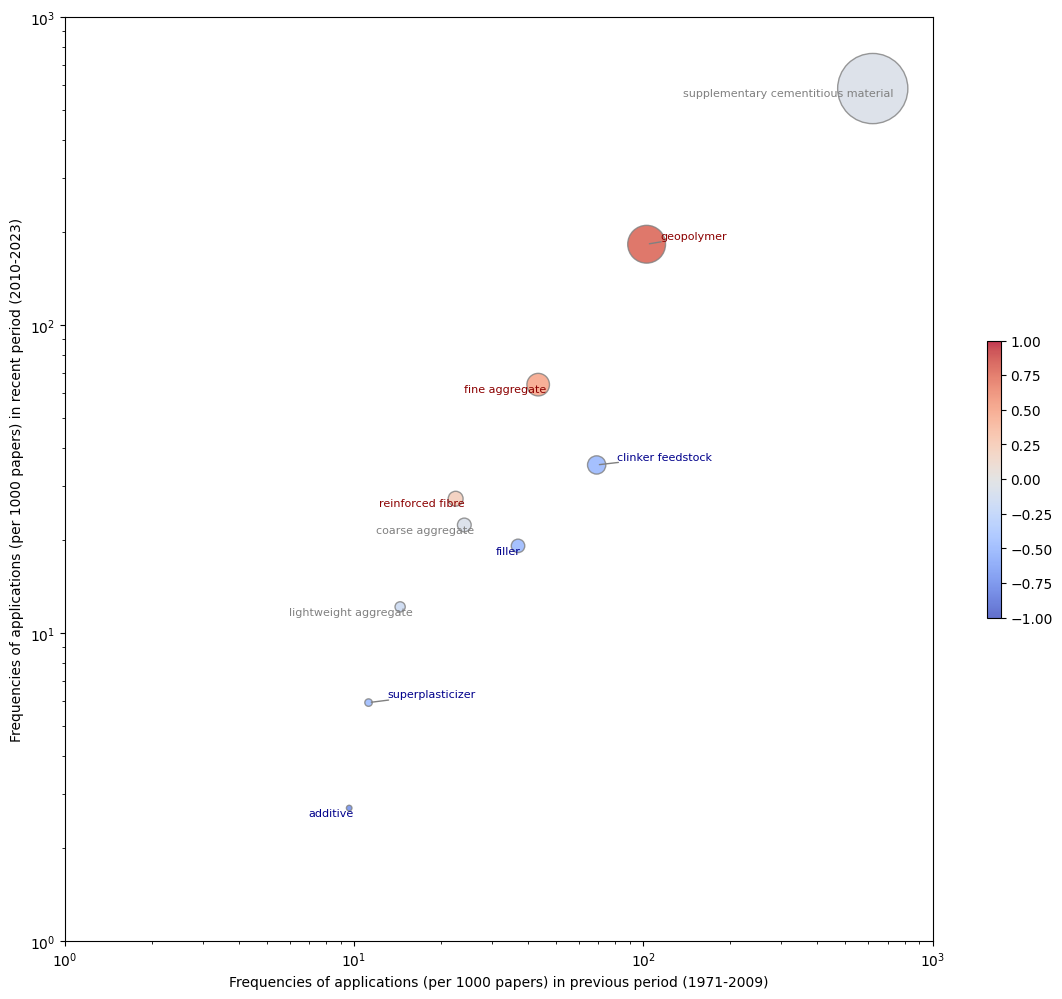

In [67]:
import seaborn as sns
import math
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(14,12))
bbp = ax.scatter(app_stat["freq_pre2010_per1000"], y=app_stat["freq_pos2010_per1000"], 
                 s=app_stat["count"], 
                 c=app_stat["trend_factor"], vmin=-1, vmax=1, alpha=0.8, cmap="coolwarm", edgecolor="grey")

plt.xlim(1,1000)
plt.ylim(1,1000)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Frequencies of applications (per 1000 papers) in previous period (1971-2009)")
plt.ylabel("Frequencies of applications (per 1000 papers) in recent period (2010-2023)")

TEXTS = []
for i in range(len(app_stat)):
    x = app_stat["freq_pre2010_per1000"].iloc[i]
    y = app_stat["freq_pos2010_per1000"].iloc[i]
    text = app_stat["application"].iloc[i]
    trend = app_stat["trend_factor"].iloc[i]
    size = app_stat["count"].iloc[i]
    if text in ["silica"]:
        continue
    
    if (x>0.5 and y>0.5) and trend<-0.2:
        TEXTS.append(ax.text(x, y, text, color="darkblue", fontsize=8))
    elif (x>0.5 and y>0.5) and trend>0.2:
        TEXTS.append(ax.text(x, y, text, color="darkred", fontsize=8))
    elif (x>0.5 and y>0.5) and size>50:
        TEXTS.append(ax.text(x, y, text, color="grey", fontsize=8))

adjust_text(TEXTS, 
            #expand=(1.5,1.5),
            arrowprops=dict(arrowstyle="-", lw=1, color="grey"),
            ax=ax)


plt.colorbar(bbp, shrink=0.3)

plt.savefig("Figs/Topic Trend/APP_topic_trend_2010.jpg")

## Plot both MAT and APP in a single bubble chart

In [19]:
mat_stat["type"] = "mat"
app_stat["type"] = "app"

stat_both = pd.concat([mat_stat.rename(columns={"material": "entity"}), 
                       app_stat.rename(columns={"application": "entity"})]).reset_index().drop(columns=["level_0", "index"])

stat_both

,entity,count,count_pre2010,count_pos2010,freq_pre2010_per1000,freq_pos2010_per1000,trend_factor,type
0,calcium carbide residue,13,2,11,2.403846,2.426114,0.009263,mat
1,raw rice husk,13,1,12,1.201923,2.646670,1.202029,mat
2,flax fibre,2,0,2,0.000000,0.441112,1000.000000,mat
3,ladle furnace slag,13,2,11,2.403846,2.426114,0.009263,mat
4,recycled aggregate,36,7,29,8.413462,6.396118,-0.239776,mat
...,...,...,...,...,...,...,...,...
76,lightweight aggregate,54,9,45,14.446228,12.168740,-0.157653,app
77,fine aggregate,264,27,237,43.338684,64.088697,0.478787,app
78,supplementary cementitious material,2555,387,2168,621.187801,586.262845,-0.056223,app
79,coarse aggregate,98,15,83,24.077047,22.444565,-0.067802,app


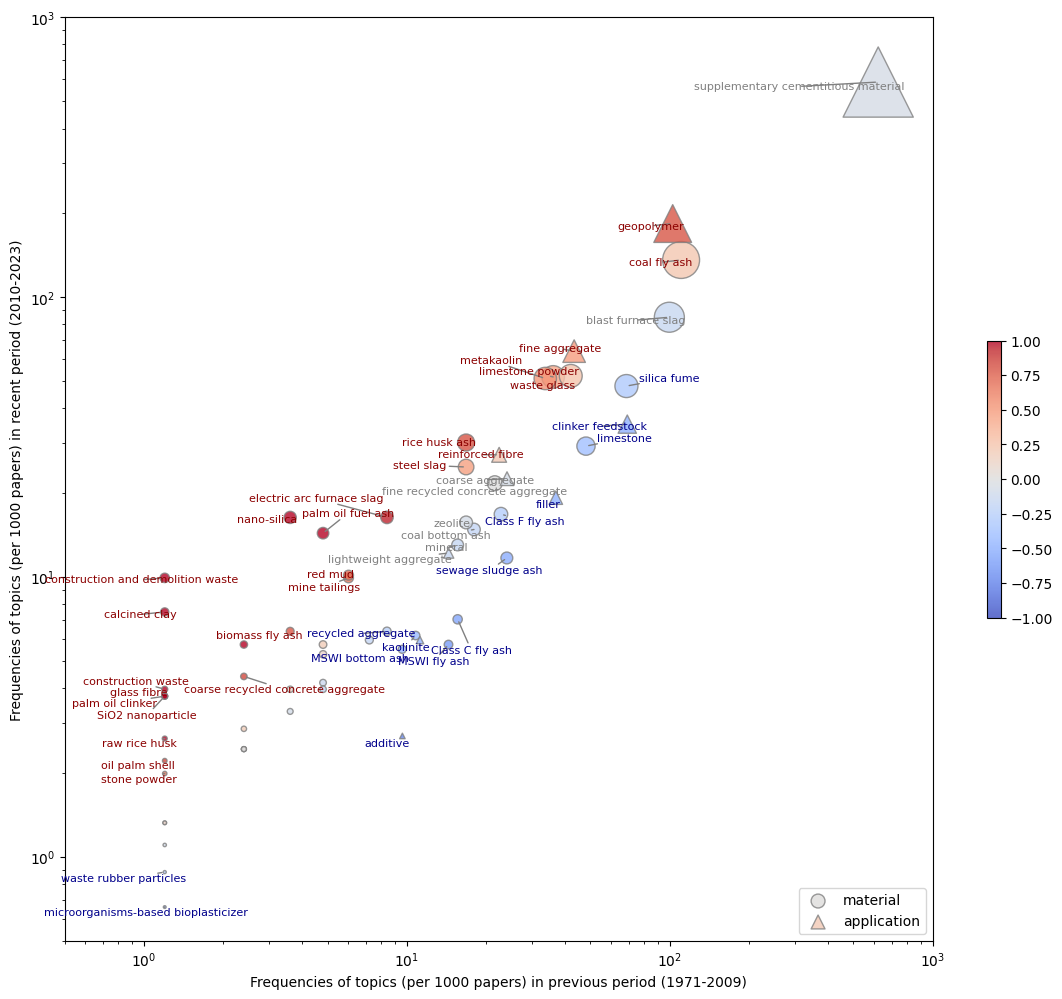

In [35]:
import seaborn as sns
import math
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(14,12))
bbp = ax.scatter(mat_stat["freq_pre2010_per1000"], y=mat_stat["freq_pos2010_per1000"], 
                 s=mat_stat["count"], marker="o", label="material",
                 c=mat_stat["trend_factor"], vmin=-1, vmax=1, alpha=0.8, cmap="coolwarm", edgecolor="grey")

bbp2 = ax.scatter(app_stat["freq_pre2010_per1000"], y=app_stat["freq_pos2010_per1000"], 
                 s=app_stat["count"], marker="^", label="application",
                 c=app_stat["trend_factor"], vmin=-1, vmax=1, alpha=0.8, cmap="coolwarm", edgecolor="grey")

plt.xlim(0.5,1000)
plt.ylim(0.5,1000)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Frequencies of topics (per 1000 papers) in previous period (1971-2009)")
plt.ylabel("Frequencies of topics (per 1000 papers) in recent period (2010-2023)")

TEXTS = []
for i in range(len(stat_both)):
    x = stat_both["freq_pre2010_per1000"].iloc[i]
    y = stat_both["freq_pos2010_per1000"].iloc[i]
    text = stat_both["entity"].iloc[i]
    trend = stat_both["trend_factor"].iloc[i]
    size = stat_both["count"].iloc[i]
    if text in ["silica", "superplasticizer"]:
        continue
    
    if (x>0.5 and y>0.5) and trend<-0.2:
        TEXTS.append(ax.text(x, y, text, color="darkblue", fontsize=8))
    elif (x>0.5 and y>0.5) and trend>0.2:
        TEXTS.append(ax.text(x, y, text, color="darkred", fontsize=8))
    elif (x>0.5 and y>0.5) and size>50:
        TEXTS.append(ax.text(x, y, text, color="grey", fontsize=8))

adjust_text(TEXTS, 
            #expand=(1.5,1.5),
            arrowprops=dict(arrowstyle="-", lw=1, color="grey"),
            ax=ax)


plt.colorbar(bbp, shrink=0.3)
lgnd = plt.legend(loc="lower right")

lgnd.legendHandles[0].set_sizes([100])
lgnd.legendHandles[1].set_sizes([100])

plt.savefig("Figs/Topic Trend/BOTH_topic_trend_2010.jpg")

## Count for MAT_APP

In [74]:
app_set = set(df_mat_app_new["app"].unique())

app_set.remove('')
app_set.remove("unknown")
app_set.remove("aggregate")
app_set.remove("pore forming agent")

app_set

{'additive',
 'clinker feedstock',
 'coarse aggregate',
 'filler',
 'fine aggregate',
 'geopolymer',
 'lightweight aggregate',
 'reinforced fibre',
 'superplasticizer',
 'supplementary cementitious material'}

In [75]:
mat_set = set(df_mat_app_new["mat"].dropna())

mat_set.remove("unknown")
mat_set.remove("fly ash")

mat_set

{'Class C fly ash',
 'Class F fly ash',
 'FeMn arc-furnace slag',
 'MSWI bottom ash',
 'MSWI fly ash',
 'SiO2 nanoparticle',
 'albite',
 'aluminium hydroxide',
 'aluminosilicate',
 'bagasse ash',
 'basalt',
 'basalt fiber',
 'biochar',
 'biomass fly ash',
 'blast furnace slag',
 'calcined clay',
 'calcium carbide residue',
 'cellulose',
 'coal bottom ash',
 'coal fly ash',
 'coarse recycled concrete aggregate',
 'colloidal nano-silica',
 'construction and demolition waste',
 'construction waste',
 'copper tailing',
 'demolished concrete waste',
 'electric arc furnace slag',
 'fine recycled concrete aggregate',
 'flax fibre',
 'fluid catalytic cracking catalyst residue',
 'glass fibre',
 'glass waste',
 'gypsum',
 'harbor sediment',
 'kaolin',
 'kaolinite',
 'ladle furnace slag',
 'lignin',
 'lime',
 'limestone',
 'limestone powder',
 'metakaolin',
 'microorganisms-based bioplasticizer',
 'microsilica',
 'mine tailings',
 'mineral',
 'nano-silica',
 'natural pozzolan',
 'nylon fibre',
 

### Separate from 2010

In [76]:
mat_app_stat = []

for mat in mat_set:
    for app in app_set:
        df_sub = df_mat_app_new[(df_mat_app_new["mat"]==mat)&(df_mat_app_new["app"]==app)]
        record = {
            "mat": mat,
            "app": app,
            "count": len(df_sub),
            "count_pre2010": len(df_sub[(df_sub["year"].to_numpy(dtype="int")<2010)]),
            "count_pos2010": len(df_sub[(df_sub["year"].to_numpy(dtype="int")>=2010)])
        }
        mat_app_stat.append(record)

mat_app_stat = pd.DataFrame.from_records(mat_app_stat)

mat_app_stat

,mat,app,count,count_pre2010,count_pos2010
0,coal fly ash,clinker feedstock,16,6,10
1,coal fly ash,lightweight aggregate,17,4,13
2,coal fly ash,superplasticizer,3,0,3
3,coal fly ash,filler,10,3,7
4,coal fly ash,additive,2,1,1
...,...,...,...,...,...
705,sewage sludge ash,supplementary cementitious material,55,15,40
706,sewage sludge ash,fine aggregate,1,0,1
707,sewage sludge ash,geopolymer,3,0,3
708,sewage sludge ash,coarse aggregate,0,0,0


In [97]:
tot_pre2010 = sum(mat_app_stat["count_pre2010"])
tot_pos2010 = sum(mat_app_stat["count_pos2010"])

mat_app_stat["freq_pre2010_per1000"] = 1000*mat_app_stat["count_pre2010"]/tot_pre2010
mat_app_stat["freq_pos2010_per1000"] = 1000*mat_app_stat["count_pos2010"]/tot_pos2010

mat_app_stat["trend_factor"] = (mat_app_stat["freq_pos2010_per1000"]-mat_app_stat["freq_pre2010_per1000"])/mat_app_stat["freq_pre2010_per1000"]
mat_app_stat = mat_app_stat.replace(float("inf"), 1)

mat_app_stat

,mat,app,count,count_pre2010,count_pos2010,freq_pre2010_per1000,freq_pos2010_per1000,trend_factor
0,coal fly ash,clinker feedstock,16,6,10,10.362694,2.877698,-0.722302
1,coal fly ash,lightweight aggregate,17,4,13,6.908463,3.741007,-0.458489
2,coal fly ash,superplasticizer,3,0,3,0.000000,0.863309,1.000000
3,coal fly ash,filler,10,3,7,5.181347,2.014388,-0.611223
4,coal fly ash,additive,2,1,1,1.727116,0.287770,-0.833381
...,...,...,...,...,...,...,...,...
705,sewage sludge ash,supplementary cementitious material,55,15,40,25.906736,11.510791,-0.555683
706,sewage sludge ash,fine aggregate,1,0,1,0.000000,0.287770,1.000000
707,sewage sludge ash,geopolymer,3,0,3,0.000000,0.863309,1.000000
708,sewage sludge ash,coarse aggregate,0,0,0,0.000000,0.000000,NaN


/tmp/ipykernel_110229/3541238371.py:40: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(bbp, shrink=0.3)


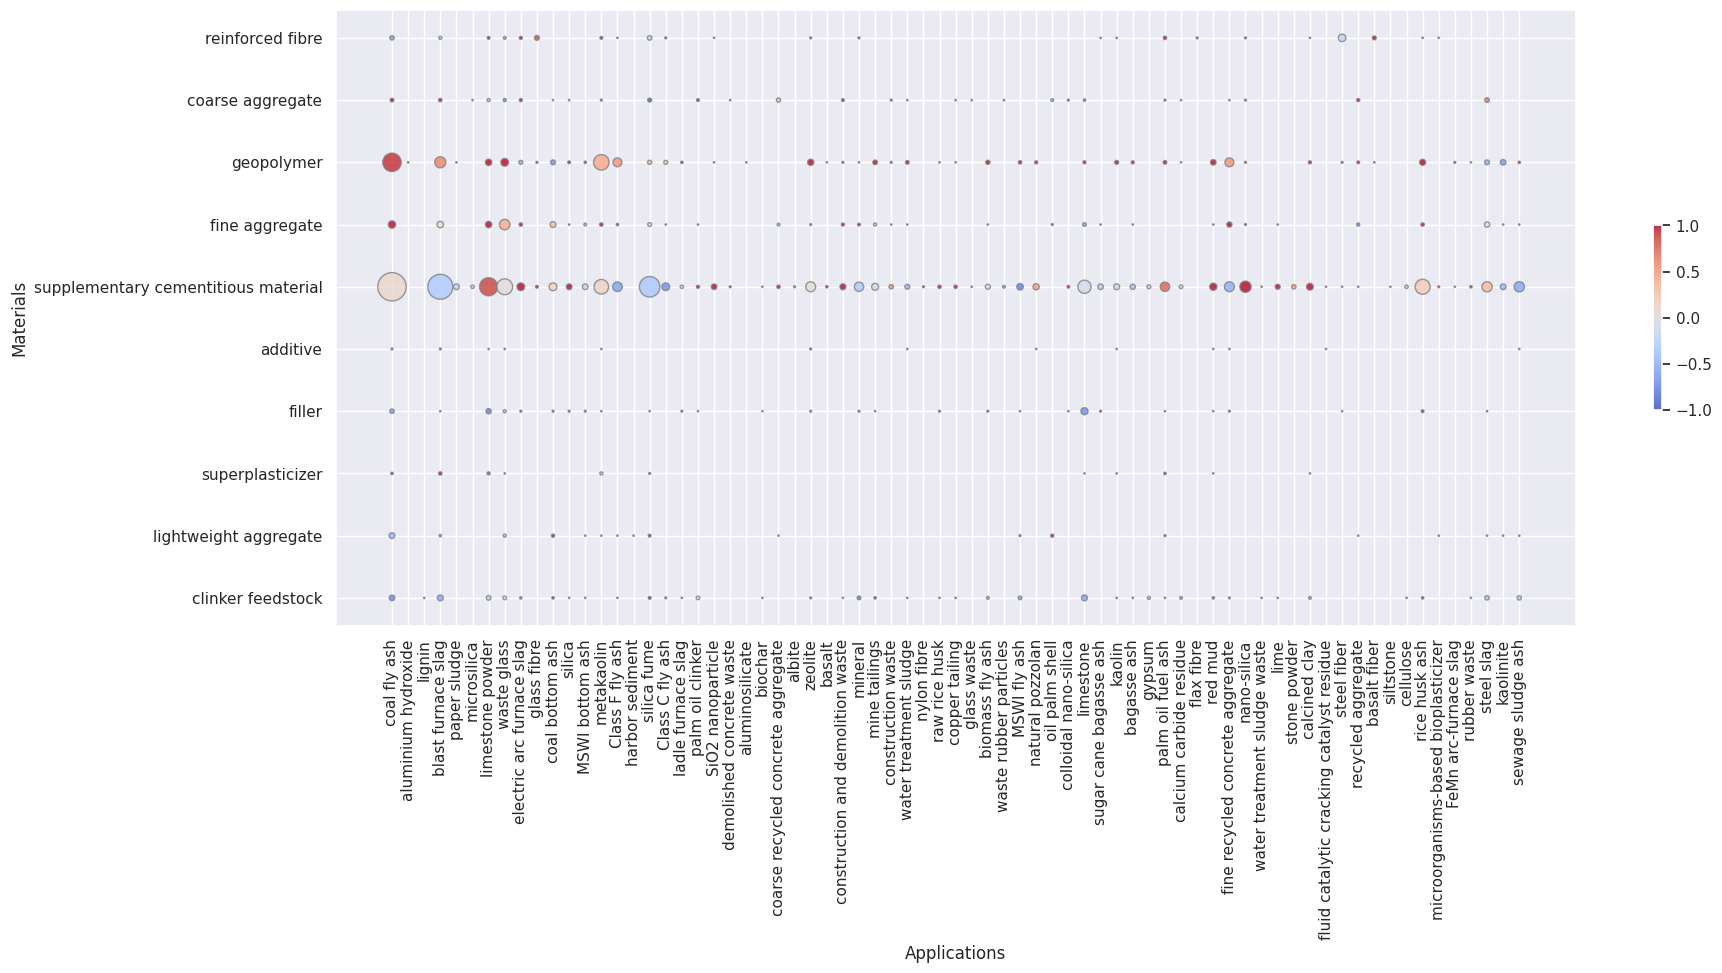

In [98]:
import seaborn as sns
import math
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(20, 8))
bbp = ax.scatter(mat_app_stat["mat"], mat_app_stat["app"], 
                 s=mat_app_stat["count"], 
                 c=mat_app_stat["trend_factor"], vmin=-1, vmax=1, alpha=0.8, cmap="coolwarm", edgecolor="grey")

plt.xlabel("Applications")
plt.ylabel("Materials")

plt.xticks(rotation=90)

"""
TEXTS = []
for i in range(len(mat_app_stat)):
    x = mat_app_stat["freq_pre2010_per1000"].iloc[i]
    y = mat_app_stat["freq_pos2010_per1000"].iloc[i]
    text = mat_app_stat["application"].iloc[i]
    trend = mat_app_stat["trend_factor"].iloc[i]
    size = mat_app_stat["count"].iloc[i]
    if text in ["silica"]:
        continue
    
    if (x>0.5 and y>0.5) and trend<-0.2:
        TEXTS.append(ax.text(x, y, text, color="darkblue", fontsize=8))
    elif (x>0.5 and y>0.5) and trend>0.2:
        TEXTS.append(ax.text(x, y, text, color="darkred", fontsize=8))
    elif (x>0.5 and y>0.5) and size>50:
        TEXTS.append(ax.text(x, y, text, color="grey", fontsize=8))

adjust_text(TEXTS, 
            #expand=(1.5,1.5),
            arrowprops=dict(arrowstyle="-", lw=1, color="grey"),
            ax=ax)
"""


plt.colorbar(bbp, shrink=0.3)

plt.savefig("Figs/Topic Trend/MAT_APP_topic_trend_bubble_2010.jpg")

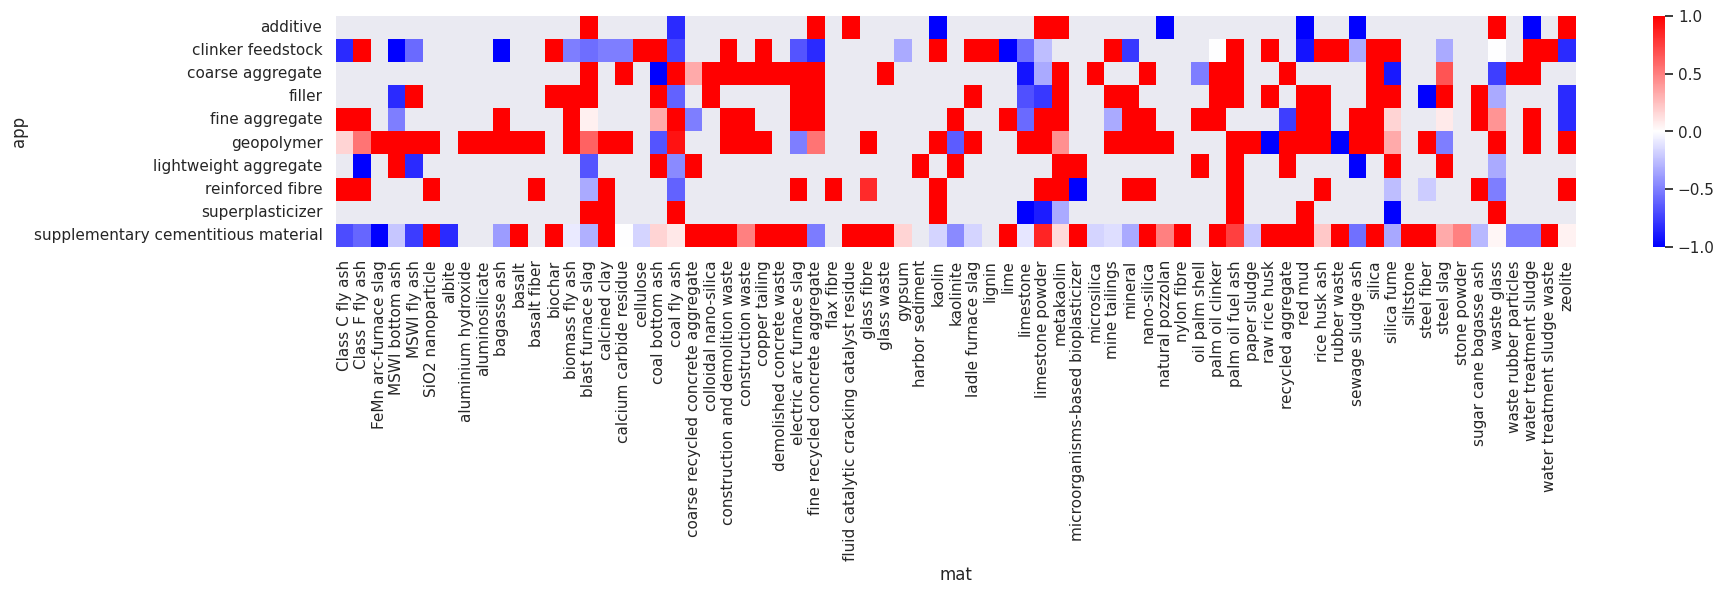

In [99]:
mat_app_trend = mat_app_stat.pivot(index="app", columns="mat", values="trend_factor")

sns.set(rc={'figure.figsize':(20, 3)})

heatmap = sns.heatmap(mat_app_trend, cmap="bwr", vmin=-1, vmax=1, cbar_kws={'shrink': 1.0}, 
                      xticklabels=True, yticklabels=True)

fig = heatmap.get_figure()
fig.savefig("Figs/Topic Trend/MAT_APP_topic_trend_heatmap_2010.jpg")